# Les équations différentielles d'ordre 1

- Définition : Une équation différentielle du premier ordre est une équation dont l'inconnue est une fonction, et où intervient la dérivée de cette fonction. 
- Rôle : Trouver une ou un intervalle de solutions à une équation donnée. 
- Intérêt : En Statistiques, en Electricité, Chimie et Biologie.

On veut trouver des exemples de problèmes concrets mettant en jeu des équations différentielles d'ordre un et les résoudre avec Python .

Ce notebook va donc répertorier des cas d'utilisation des équations différentielles, avec un <b>vocabulaire le plus simpliste possible.</b>

!! ATTENTION DOCUMENT EN COURS DE CREATION EN MAI 2023, CA VA ETRE ASSEZ LONG A FAIRE,  JE TRIERAIS LES MEILLEURS EXEMPLES TROUVES SUR INTERNET ENSUITE POUR LINSTANT JE LES METS A LA SUITE , JE VAIS BIEN ANNOTER LES VARIABLES ET LEURS SENS POUR QU ON PUISSE RESOUDRE DES PROBLEMES SANS THEORIE ET LES DERIVER , MAIS EN TANT QUE TECHNICIEN!!



## Exemple 1 : Croissance de population





Démontrons une simulation où nous commençons avec 100 animaux, 
un taux de croissance net de 10 % (0,1) par unité de temps, qui peut être d'un mois, et t∈[0,20] mois. 

Nous pouvons d'abord essayer Δt d'un demi-mois (0,5), ce qui implique Nt=40 (ou pour être absolument précis, le dernier instant à calculer selon notre configuration ci-dessus est tNt+1=20,5). 

La figure Evolution d'une population calculée au pas de temps 0,5 mois montre les résultats. La ligne continue est la solution exacte, tandis que les cercles sont la solution numérique calculée. 

L'écart est bien visible. Et si nous rendions Δt 10 fois plus petit ? Le résultat est affiché dans la figure Évolution d'une population calculée avec un pas de temps de 0,05 mois, où nous utilisons maintenant une ligne continue également pour la solution numérique (sinon, 400 cercles auraient l'air très encombrés, donc le programme a un test sur la façon d'afficher le solution numérique, sous forme de cercles ou de ligne continue). 

Nous pouvons difficilement distinguer la solution exacte et la solution numérique. Le temps de calcul est également d'une fraction de seconde sur un ordinateur portable, il apparaît donc que la méthode Forward Euler est suffisamment précise à des fins pratiques. 

(Ce n'est pas toujours vrai pour les grands modèles de simulation compliqués en ingénierie, donc des méthodes plus sophistiquées peuvent être nécessaires.)

4.2 Population Growth and Decay

dN(t)/dt =kN(t)

where N(t) denotes population at time t and k is a constant of proportionality, serves as a model for population


Voici les 3 méthodes de calcul apparentées sur ce sujet : 
<img src ="img/logisitcornot.png"></img>


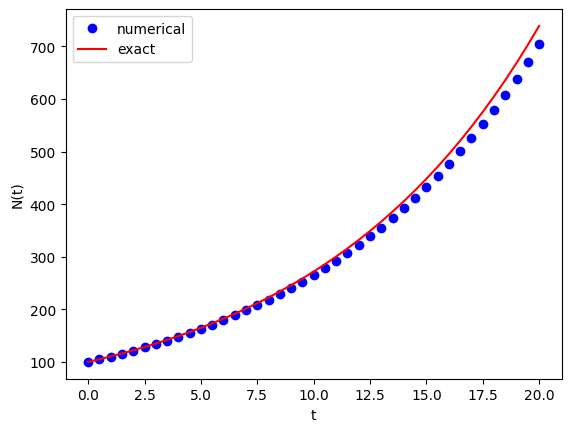

In [59]:
# N_0 = input('Give initial population size N_0: ')
# r   = input('Give net growth rate r: ')
# dt  = input('Give time step size: ')
# N_t = input('Give number of steps: ')

from numpy import linspace, zeros, exp

N_0 = 100
r   = 0.1
dt  = 0.5
N_t = 40


t = linspace(0, N_t*dt, N_t+1)
N = zeros(N_t+1)

N[0] = N_0
for n in range(N_t):
    N[n+1] = N[n] + r*dt*N[n]

import matplotlib.pyplot as plt
numerical_sol = 'bo' if N_t < 70 else 'b-'
plt.plot(t, N, numerical_sol, t, N_0*exp(r*t), 'r-')
plt.legend(['numerical', 'exact'], loc='upper left')
plt.xlabel('t'); plt.ylabel('N(t)')
filestem = 'img/growth1_%dsteps' % N_t
plt.savefig('%s.png' % filestem); plt.savefig('%s.pdf' % filestem)




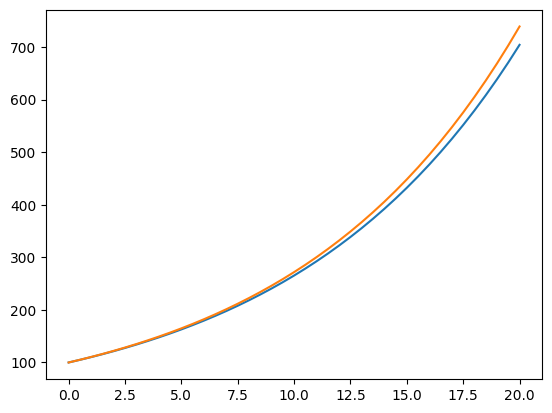

In [60]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_population_growth():
    """Test case: u'=r*u, u(0)=100."""
    def f(u, t):
        return 0.1*u

    u, t = ode_FE(f=f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()

if __name__ == '__main__':
    demo_population_growth()

## Exemple 2 : Evolution de population de zèbres dans un parc pour animaux

- https://caam37830.github.io/book/04_functions/ode_initial.html

Vos zèbres continuent d'avoir des bébés. C'est gérable pour l'instant, et les bébés zèbres sont mignons. Cependant, vous êtes un peu inquiet du nombre de zebres que vous devrez nourrir et vous voulez comprendre ce qui se passera si vous laissez les choses aller sans contrôle. Naturellement, vous décidez d'écrire un programme pour simuler votre problème de zèbre.

Disons que vous avez
zèbres ce mois-ci. Le nombre de bébés zèbres qui apparaîtront le mois prochain est proportionnel à la population actuelle

Il est maintenant temps de lancer votre interpréteur Python. Nous utiliserons solve_ivp dans scipy.integrate - il s'agit d'un wrapper de haut niveau avec de nombreuses options pour résoudre les problèmes de valeur initiale. Les arguments importants à fournir sont :

    f(t, y) - une fonction Python qui renvoie le côté droit de l'ODE - cela peut être une fonction à valeurs multiples

    t_span - un tuple (t0, t1) qui donne les heures de début et de fin de la simulation

    z0 - l'état du système à t0




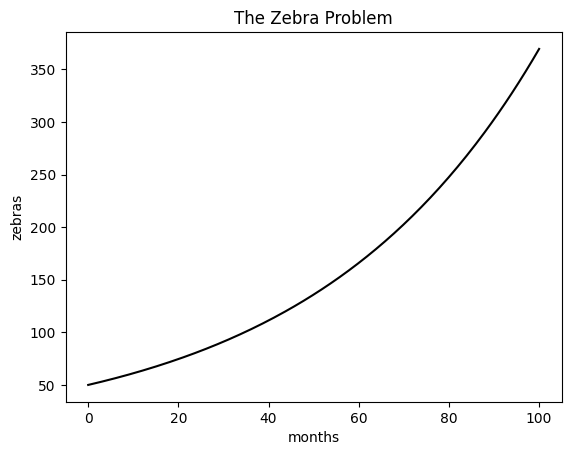

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

z0 = np.array([50])
alpha = 0.02

f = lambda t, z : alpha * z
t_span = (0, 100)
t_eval = np.linspace(0,100, 200)

sol = solve_ivp(f, t_span, z0, t_eval=t_eval)
    
plt.plot(sol.t, sol.y[0], c='k')
plt.title("The Zebra Problem")
plt.ylabel("zebras")
plt.xlabel("months")
plt.show()

# Exemple 3 : Diffusion d'une drogue dans le sang

Lien : https://www.quora.com/What-are-some-examples-of-first-order-differential-equations-which-describe-population-growth-or-decay-processes



# Exemple 4 : 4.1 Cooling/Warming Law

La formulation mathématique de la loi empirique de Newton sur le refroidissement d'un objet est donnée par l'équation différentielle linéaire du premier ordre

# Exemple 5 :Expansion de maladie

https://www.quora.com/What-are-some-examples-of-first-order-differential-equations-which-describe-population-growth-or-decay-processes

Chris Hall
Studied at THE UNIVERSITY OF LONDON Upvoted by Thierry Kauffmann, PhD Physics (1996)Author 

Prenons un exemple.

Imaginez une île déserte où un virus mortel s'installe.

Chaque jour, un dixième de la population meurt.


On pourrait dire que :

Nombre de décès par jour = 0,1 x population


Écrivons maintenant ceci en utilisant des symboles mathématiques :

- dN / dt = 0.1 x N

oû :

dN / dt = Nombre de décès par jour

Le signe négatif nous indique que les personnes qui meurent diminuent la population (c'est un changement négatif)

N = Population

QU'ARRIVERA-T-IL À LA POPULATION, N ?

La population, N, diminuera évidemment chaque jour.

Cela signifie que le nombre de personnes qui meurent chaque jour diminuera également.


Par exemple:

Au jour zéro la population est de 10 000 et puis le virus arrive

Le premier jour, la population commence à 10 000, donc 1 000 meurent

Le deuxième jour, la population commence à 9000 donc 900 meurent

Le troisième jour, la population commence à 8100 donc 810 meurent

et ainsi de suite.

PUIS-JE DÉTERMINER COMBIEN DE PERSONNES SERONT EN VIE APRÈS 12 JOURS ?

Eh bien, vous pouvez vous en sortir comme je l'ai fait ci-dessus pendant trois jours, mais continuez jusqu'au jour 12.

Mais ce serait un peu fastidieux.

Donc, un moyen plus rapide est de regarder à nouveau notre équation.

C'est ici:


- dN / dt = 0.1 x N

This type of equation is called a differential equation.

The nice thing about differential equations is that we can write them in a different way.

So we can write any differential equation in a way that looks totally different.

When we do this we say that we are going to "solve the differential equation."

If we solve: - dN / dt = 0.1 x N

We get:

N = n x e^-0.1xt

n= the population to begin with (on day zero)

e = 2.71 ( this is an important number in maths and physics called the exponential constant)

t = the number of days I am interested in

N = the population after t days.

So, after 12 days:

N = n x e^-0.1xt

N = 10 000 x e^-0.1x12

N = 10 000 x e^-1.2

If you use your scientific calculator to work out e^-1.2 you will get 0.30

So: N = 10 000 x 0.30

N = 3000

After 12 days the population will be 3000.

HOW DO I SOLVE DIFFERENTIAL EQUATIONS?

If you study calculus this is one of the things you will learn to do.

WHY ARE DIFFERENTIAL EQUATIONS IMPORTANT?

All sorts of things in the world around us can be described by differential equations.

So they are really important in Physics.

And by knowing how to solve them we can work things out much more quickly than having to go through lots of steps.

# RESTE A FAIRE : Exemple 7 : Radio-Active Decay and Carbon Dating

a radioactive substance decomposes at a rate proportional to its mass. This rate is called the decay rate. If m(t) represents the mass of a substance at any time, then the decay rate dm/dt is proportional

to m(t). Let us recall that the half-life of a substance is the amount of time for it to decay to one-half of its initial mass.

4.4 Mixture of Two Salt Solutions

4.5 Series Circuits

Prey and Predator

Object falling under air resistance

https://physics.stackexchange.com/questions/104368/free-falling-object-with-air-resistance
https://stackoverflow.com/questions/71542662/python-plotting-free-fall-with-drag
https://scipython.com/book2/chapter-8-scipy/examples/a-projectile-with-air-resistance/

Harvesting of renewable resources

## 8. Economie  : Le modèle Black Scholes

https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model